In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk import download
from textblob import TextBlob

In [2]:
# Download required NLTK data
download('punkt')
download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\indira\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\indira\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# 2. Load Data
df = pd.read_csv("blogs.csv")  # Make sure this file is in the same directory
print(df.info())
print(df.head())


# - Total Entries: Replace with => df.shape[0]
# - Number of Unique Categories: Replace with => df['Labels'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None
                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism


In [4]:
# 3. Basic EDA
print("Unique Categories:", df['Labels'].nunique())
print("Sample Category Distribution:\n", df['Labels'].value_counts())

Unique Categories: 20
Sample Category Distribution:
 Labels
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: count, dtype: int64


In [5]:
# 4. Text Preprocessing Function

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@w+|\#','', text)  # Remove mentions/hashtags
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]  # Apply stemming
    return " ".join(tokens)



In [6]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\indira\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [7]:
# Apply preprocessing
df['Clean_Text'] = df['Data'].astype(str).apply(preprocess_text)

In [8]:
# 5. Feature Extraction using TF-IDF

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Clean_Text'])  # Transformed text data

# Labels
y = df['Labels']

In [9]:
# 6. Split the Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# 7. Train Naive Bayes Classifier

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [11]:
# 8. Make Predictions

y_pred = nb_model.predict(X_test)

In [12]:
# 9. Model Evaluation

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

# - Accuracy: Replace with => accuracy (e.g. 0.85)
# - Use below print to get all scores
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.8225

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.47      0.78      0.58        18
           comp.graphics       0.83      0.83      0.83        18
 comp.os.ms-windows.misc       0.79      0.86      0.83        22
comp.sys.ibm.pc.hardware       0.87      0.80      0.83        25
   comp.sys.mac.hardware       0.82      0.86      0.84        21
          comp.windows.x       0.88      0.88      0.88        25
            misc.forsale       0.79      0.61      0.69        18
               rec.autos       0.94      0.89      0.91        18
         rec.motorcycles       0.83      0.94      0.88        16
      rec.sport.baseball       0.82      1.00      0.90        18
        rec.sport.hockey       1.00      1.00      1.00        15
               sci.crypt       0.82      0.95      0.88        19
         sci.electronics       0.67      0.75      0.71        16
                 sci.med   

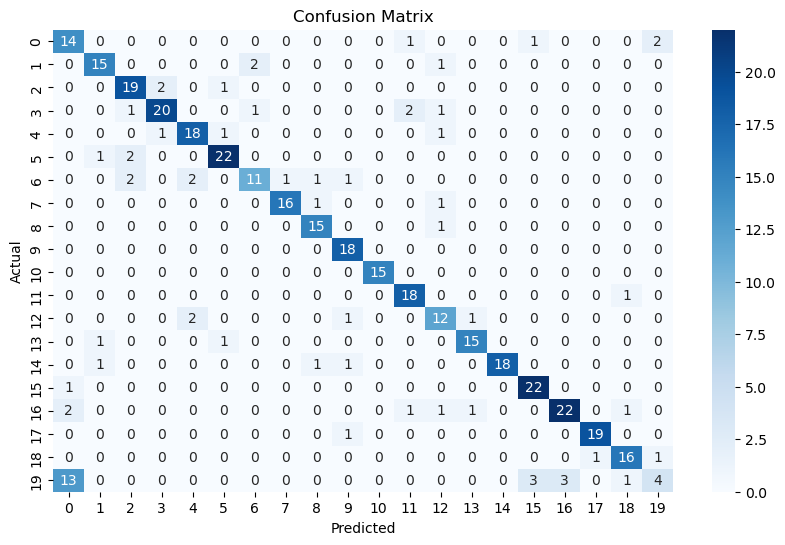

In [13]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("confusion_matrix.png")  # Save the image for report
plt.show()

In [14]:
# 10. Sentiment Analysis using TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['Data'].astype(str).apply(get_sentiment)

In [15]:
# 11. Sentiment Distribution

sentiment_counts = df['Sentiment'].value_counts()
print("\nSentiment Distribution:\n", sentiment_counts)

# - Positive Count: Replace with => sentiment_counts['Positive']
# - Negative Count: Replace with => sentiment_counts['Negative']
# - Neutral Count : Replace with => sentiment_counts['Neutral']


Sentiment Distribution:
 Sentiment
Positive    1543
Negative     457
Name: count, dtype: int64


In [16]:
# 12. Sentiment by Category

sentiment_by_category = pd.crosstab(df['Labels'], df['Sentiment'])
print("\nSentiment by Category:\n", sentiment_by_category)


Sentiment by Category:
 Sentiment                 Negative  Positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey                34        66
sci.crypt                       19        81
sci.electronics                 19        81
sci.med                         29        71
sci.space                       27        73
soc.religion.christian          13        87
talk.politics.guns              30        70
talk.politics.mideast           22        78
talk.politics.misc              22        78
talk.religion.misc            

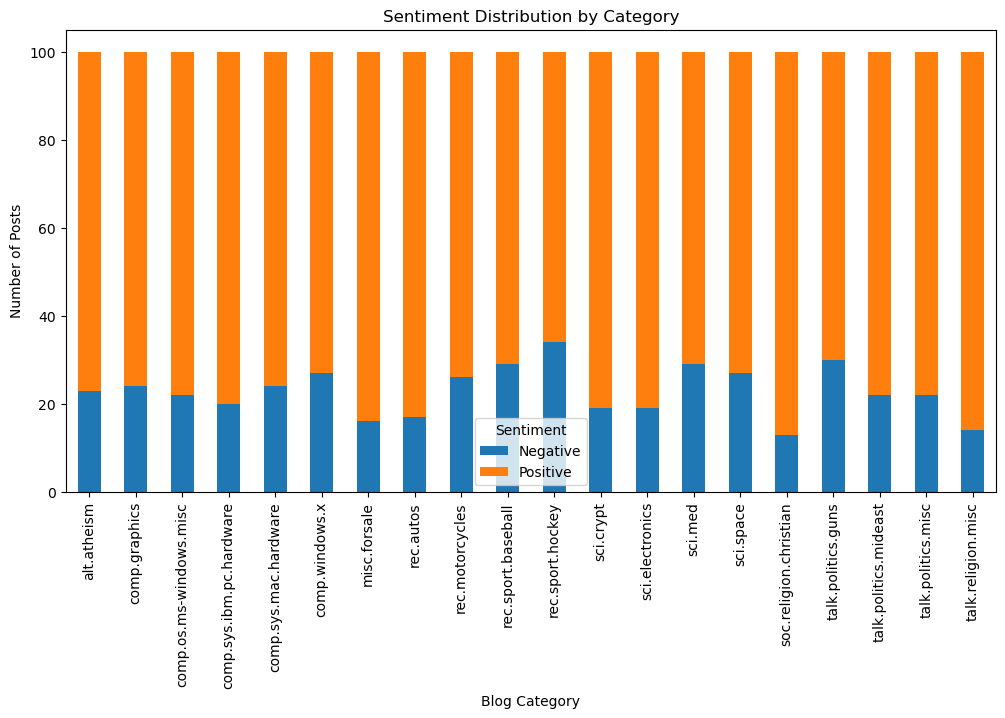

In [17]:
# Plot Sentiment Distribution by Category
sentiment_by_category.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Sentiment Distribution by Category')
plt.xlabel('Blog Category')
plt.ylabel('Number of Posts')
plt.savefig("sentiment_by_category.png")  # Save the image for report
plt.show()


# - Attach sentiment_by_category.png to visualize emotional tone per blog theme
# - Comment on which categories are mostly Positive/Negative/Neutral



In [18]:
df

,Data,Labels,Clean_Text,Sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,Positive
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroup altath path cantaloupesrvcscmueducra...,Negative
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...,Positive
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,Positive
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloupesrvcscmuedu altatheism53485 tal...,Positive
...,...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,xref cantaloupesrvcscmuedu talkabortion120945 ...,Positive
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,xref cantaloupesrvcscmuedu talkreligionmisc837...,Positive
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,xref cantaloupesrvcscmuedu talkorigins41030 ta...,Positive
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,xref cantaloupesrvcscmuedu talkreligionmisc836...,Positive
